In [1]:
!pip install lightgbm

### 분류모델

In [3]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import mglearn
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

In [5]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [6]:
lgb = LGBMClassifier(n_estimators=100, random_state=0)

In [7]:
#모델 훈련
lgb.fit(x_train, y_train)

LGBMClassifier(random_state=0)

In [8]:
#훈련 세트 정확도
lgb.score(x_train, y_train)

1.0

In [9]:
#테스트 세트 정확도
lgb.score(x_test, y_test)

0.972027972027972

### 사전 가지치기

In [10]:
lgb = LGBMClassifier(max_depth=1, random_state=42)

In [11]:
lgb.fit(x_train, y_train)

LGBMClassifier(max_depth=1, random_state=42)

In [12]:
lgb.score(x_train, y_train) #위의 기본모델보다 과대적합 조금 해소

0.9882629107981221

In [13]:
lgb.score(x_test, y_test)

0.965034965034965

### 학습률 낮추기

In [18]:
#모델 정의
lgb = LGBMClassifier(random_state=0, learning_rate=0.01)

In [19]:
#모델 학습
lgb.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.01, random_state=0)

In [20]:
#모델 정확도 - 훈련 데이터
lgb.score(x_train, y_train) #위의 모델보다 과대적합 조금 해소

0.9812206572769953

In [21]:
#모델 정확도 - 테스트 데이터
lgb.score(x_test, y_test)

0.958041958041958

### 특성 중요도 시각화

(-1.0, 30.0)

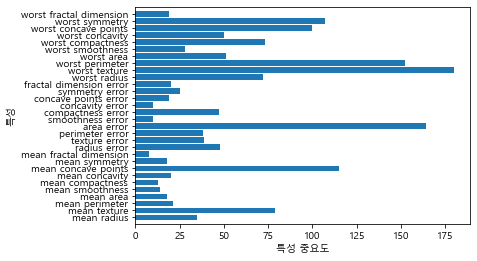

In [23]:
n_features = cancer.data.shape[1] #데이터의 행의 개수
plt.barh(np.arange(n_features), lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

### 회귀모델

In [24]:
from sklearn.datasets import load_boston
from lightgbm import LGBMRegressor
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

In [28]:
lgb = LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=0)
#n_estimators: decision tree 개수

In [29]:
lgb.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.01, max_depth=3, random_state=0)

(-1.0, 13.0)

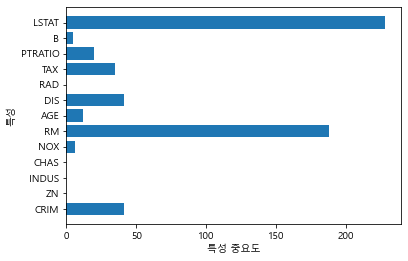

In [36]:
n_features = boston.data.shape[1]
plt.barh(np.arange(n_features), lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
#LSTAT: root 노드로 사용